<a href="https://colab.research.google.com/github/manasdutta04/LGMVIP/blob/main/TASK 2-MUSIC RECOMMENDATION/MUSIC RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: MANAS DUTTA

BATCH: 1 DECEMBER LGMVIP

DATA SCIENCE LetsGrowMore INTERNSHIP

TASK 2

PROJECT NAME: Music Recommendation

PROBLEM STATEMENT: Music recommender systems can suggest songs to users based on their listening patterns.

# Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing datasets

In [2]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path = "train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv("songs.csv")
members = pd.read_csv("members.csv")

### Train dataset

In [3]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [4]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
3786,/Yd0Pa/VIxnVhTJ+Je0NSBzLjB97AElcltJozW8IgmU=,0J2MM7SfXD1MR/A/fv+20HNXJPoLtIdGfauVTMU6C6w=,my library,Local playlist more,local-library,1
3703,keau6KE8h3d9XjnC4NuyAIpbqokD7ynF3K6eLGwmWWs=,XdtisLA7a4mRgAHIqTJqlURFL9hU0jrAvH5PUg2C/Bw=,radio,Radio,radio,0
2585,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,Rm0XiOKu3hBT8tqHh/hTqF1cl2Nq6W4UNzYBrvKcb54=,my library,Local playlist more,local-playlist,1
946,ceXOGLrR/mNwc0OCAoTvYYDAlMmf0A25nG0d0Rx5HeM=,gP4t+REbMdgJSVu+IfNMuCeOxLGQO8MD+vsxWLsnqOo=,my library,Local playlist more,local-library,1
6213,NwauapyJfO3HxiQMBcCW/Fw/Ad76bn2FW0Vc1Ehurm4=,podlycp3c6tOEDw7q8iQBVgvFjiMpkWWXTlXljGdbTY=,my library,Local playlist more,local-library,1
2644,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,cSagYCpJkC0Xh0j7mgPqhlmhI+IyNTi+5pQ+JBjGkzo=,my library,Local playlist more,local-library,0
6747,2F5MLrkIvrmy0RcQkekTvL1WlKGAHcKo4RaIVuCGND4=,LEAxfXLBS+nCSmPCAvpwRw3h8HhKZydKZWbDYHNod1Q=,listen with,Others profile more,listen-with,0
1422,HGwvm9dAs2f3s7FRH8asP3QazYB6HPcSaA0h7CO/5KQ=,shYcSF/8MpYMxMzLfRznBZjwoQIvd+RUH06UamCj8ks=,my library,Local playlist more,local-playlist,1
5341,TxvdtN1Ehq4kbgU5J7lw+ik6Pc0NZjnQKARPiCCf0fk=,Ru/BWHOZA6gyfS51JY7NDhpGnrfePhnv5NQaYPMH2GM=,my library,Local playlist more,local-library,1
1458,loyLGYzAwC3Vxt9ra9UWGOesmtHaCcNy1Vg+qAnYcvo=,f9Nq+kWzYg7TTh5cWUY8BWTcZd7y6aUl9QVWnBJM984=,my library,Local playlist more,local-playlist,1


In [5]:
train.shape

(7000, 6)

In [6]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [7]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [9]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

### Songs datasets

In [10]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220.0,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793.0,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623.0,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629.0,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [11]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
63101,n3z2/Skgc2J4Chapus/7cMeYFBykK/Y15TXnnI7socM=,180035.0,786,Richard Clayderman,NaN,NaN,-1.0
8555,vGYO8OeIiMxSh4V7JA+UWZ4QBOHMhyJD6FqoPlzx/Gk=,227694.0,465,Jimmy Cliff,NaN,NaN,52.0
164952,ebzWAtTpsB13wUUj8kkNblwLjcdut6Pl06IivqH5GWo=,223468.0,921,Ronan Hardiman,NaN,NaN,52.0
3005,dlr65xxgJGfsWuKaa1MLai+JutHMWqCRJea72HWv8kI=,278674.0,465,謝金燕 (Jeannie Hsieh),NaN,NaN,10.0
165203,yifi378lSKAiiHhryuXW0fDQWSuPiKlG92/E0Pio7S0=,237957.0,2122,Bassa Nova,NaN,NaN,-1.0
210477,1AClAykDpiprkQ9sOT4RSG2ets8m5i5LH6UGcx9Ur+c=,177084.0,359,Elle King,Elle King| Dave Bassett,Elle King| Dave Bassett,52.0
198229,n67BQAMAC0OPNBw7unnR3f58eU+g73X4bML2bAYP+UU=,198112.0,465,歐陽菲菲,Kyohei Tsutsumi,Haruo Hayashi,17.0
60448,rXudjzXHmkTwVcnFfSn+qeV/MV9AJSm3nor4xPvpuPI=,232942.0,465,Billboard Top 100 Hits,J.-K. Schuster| M. Martin| T. Swift,NaN,52.0
196910,GbnGOkHhM35XM1dnAaQFexXGNzi+1J2G3s0C46UJhy0=,199157.0,NaN,SET IT OFF,NaN,NaN,52.0
171833,8KIY4uya2n5n+XHjxwvht4PDkFR6QovfLtBjl/7iuEE=,222354.0,465,Ben's Brother,Jamie Hartman,NaN,52.0


In [12]:
songs.shape

(233589, 7)

In [13]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [14]:
songs.describe()

,song_length,language
count,2.335880e+05,233588.000000
mean,2.475365e+05,27.683922
std,1.422073e+05,23.595023
min,1.253000e+03,-1.000000
25%,1.971720e+05,3.000000
50%,2.327560e+05,31.000000
75%,2.739720e+05,52.000000
max,9.146340e+06,59.000000


In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233589 entries, 0 to 233588
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      233589 non-null  object 
 1   song_length  233588 non-null  float64
 2   genre_ids    228351 non-null  object 
 3   artist_name  233588 non-null  object 
 4   composer     133209 non-null  object 
 5   lyricist     57850 non-null   object 
 6   language     233588 non-null  float64
dtypes: float64(2), object(5)
memory usage: 12.5+ MB


In [16]:
songs.isnull().sum()

song_id             0
song_length         1
genre_ids        5238
artist_name         1
composer       100380
lyricist       175739
language            1
dtype: int64

### Members datasets

In [17]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [18]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
27513,gtWHyFbX2i0cLsTX8wJv3Qw9Spm4KEICoq2WOKocLPs=,1,0,NaN,7,20141205,20171004
21608,ynMSp/W59u05knJjPy6F0tUfTMGbSwtRS6T674KQ7X0=,1,0,NaN,3,20130702,20180317
24387,NCzk6845yrTWbdZGKGlXWWviUogEsSp7/DIxm4EtpP0=,1,0,NaN,3,20131213,20170911
10650,wXjX/TNOqFIIaBx4dYUCcztyJZoo4HN/94z6p49uNAA=,1,0,NaN,4,20160821,20170123
14595,z192LV/c24RLW27IFyXDHfZqGFiQI9KcurtBg735g5U=,1,22,female,3,20160206,20170610
19236,Jn3P4Y1OP7F4Hyc8FcMrgMCoSaO6JEb/o9LfqyF70i0=,1,0,NaN,9,20150626,20170614
33887,yk9OwJUEAfFuAm72PyOMgfXqQaXdTKdYYhb7CT5QR0E=,5,0,male,7,20130916,20170909
19604,1Ge0Gi0r0IYB/AifDlUEld63N14H8PPHiUueTs3IJOo=,1,0,NaN,4,20170103,20170106
32101,fGddBnT2fHasNqu6Z+RE8TwSDZB8wljsy4Z2dpLh1xU=,4,26,male,9,20060301,20171003
31098,lBZSnP+c7ZQTEASy6gpfuQa3ULQziPDzYTFfuQ7REgY=,15,33,female,9,20080613,20170930


In [19]:
members.shape

(34403, 7)

In [20]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [21]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [22]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [23]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# Data Visualization

<Axes: xlabel='source_system_tab', ylabel='count'>

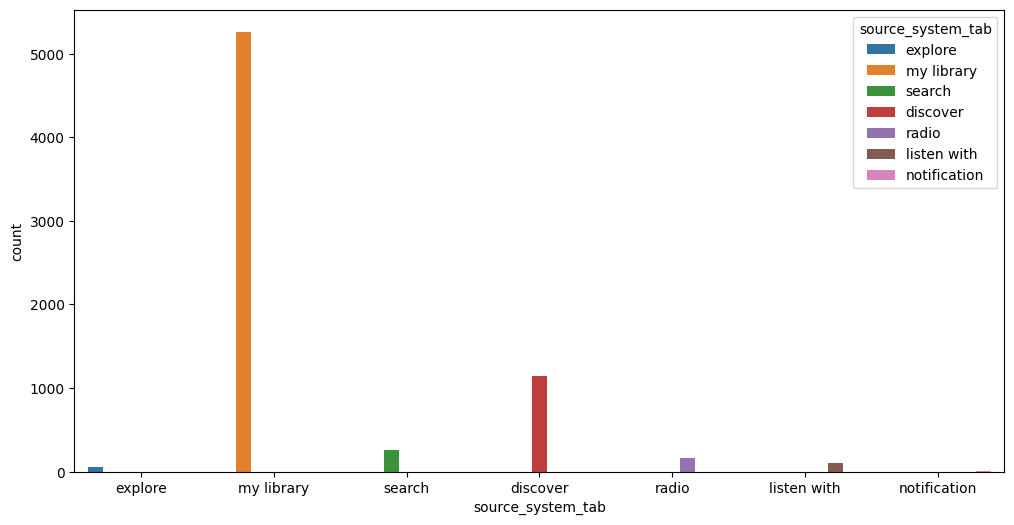

In [24]:
#DATA VISUALIZATION
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<Axes: xlabel='source_system_tab', ylabel='count'>

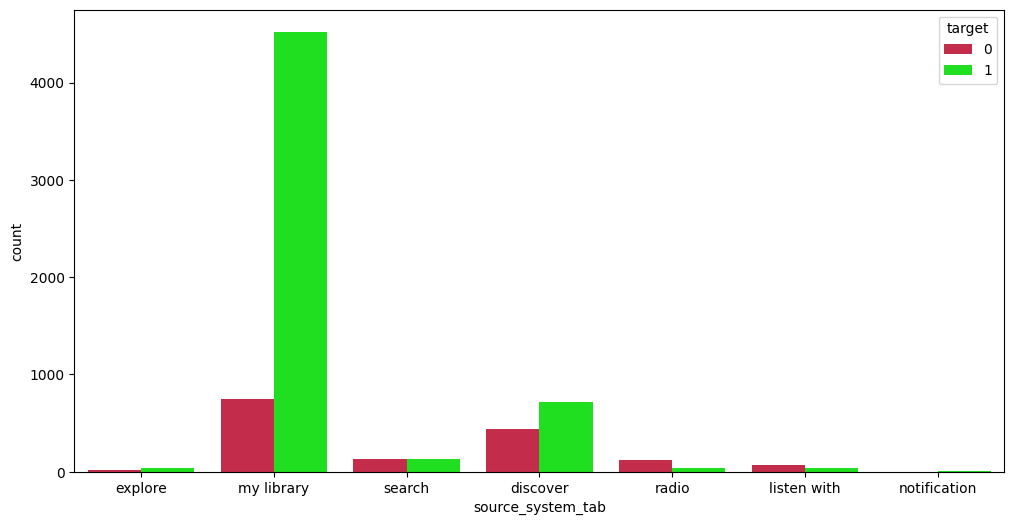

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

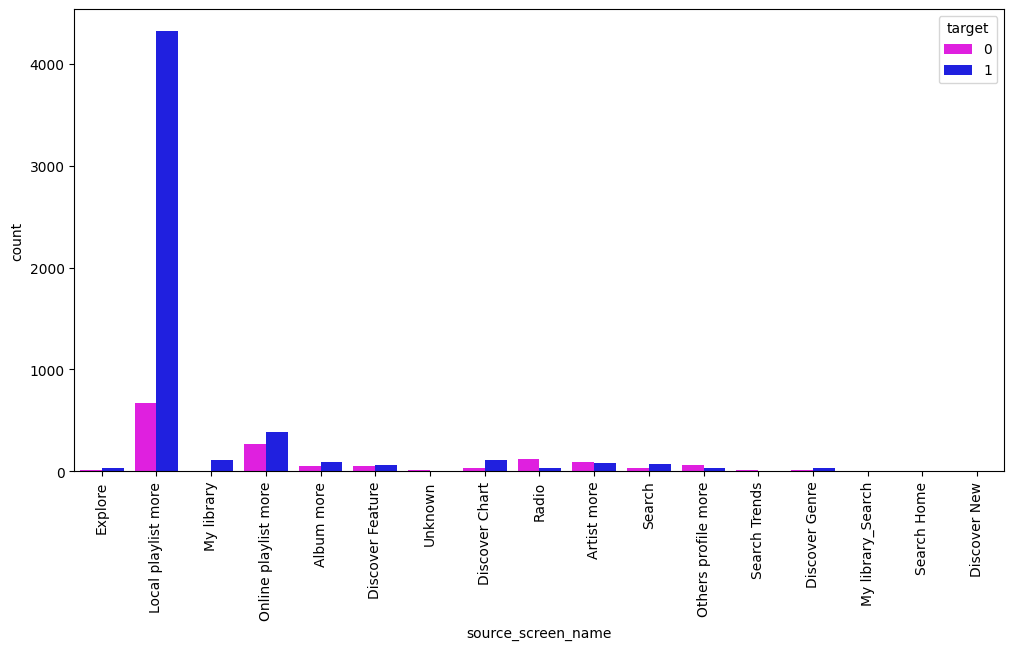

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()


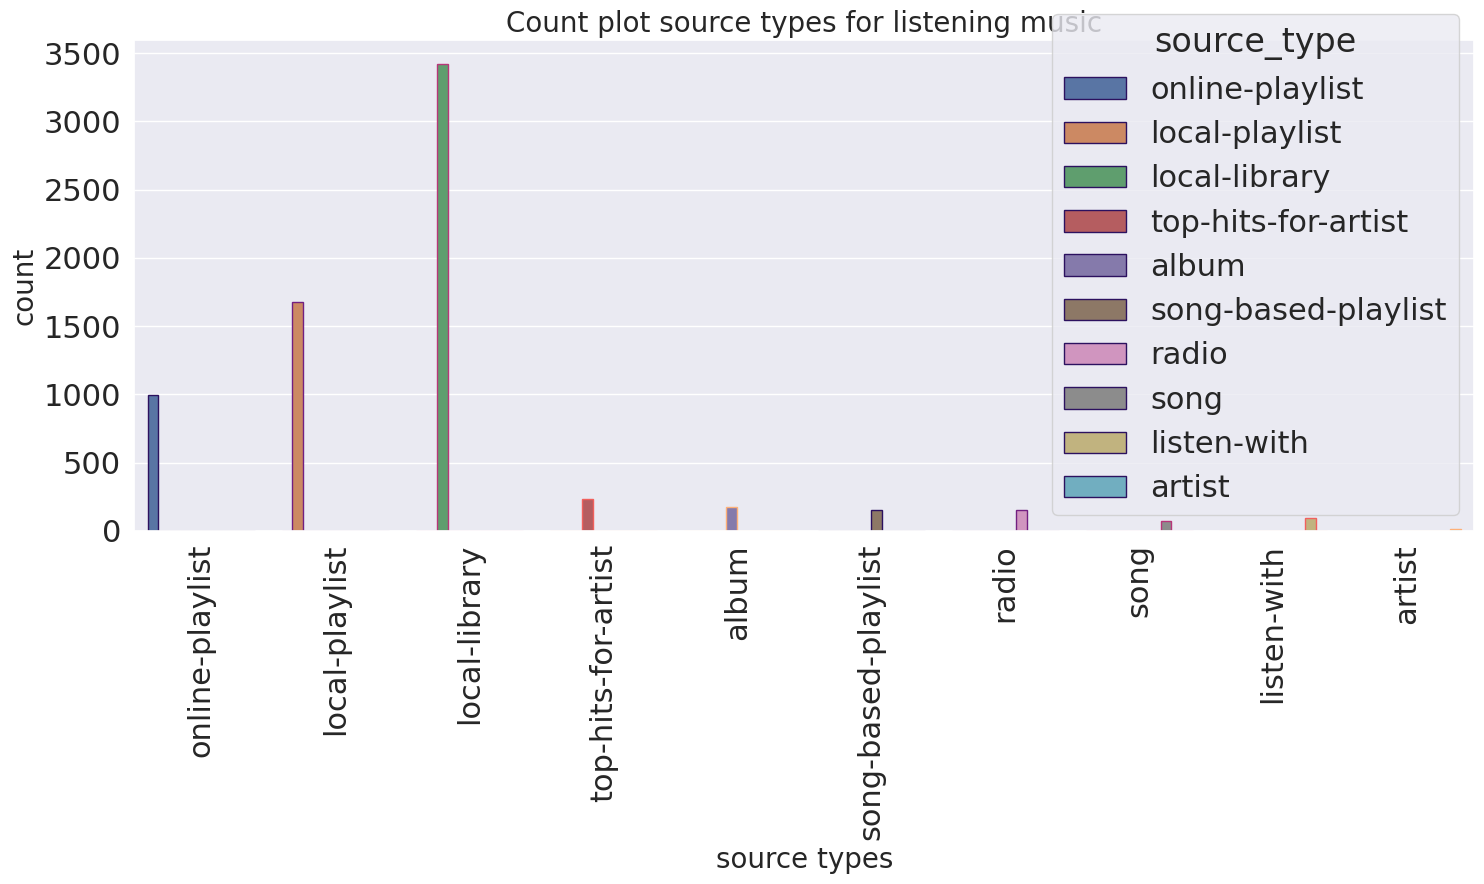

In [31]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='vertical')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

1. source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.

2. It can be depicted from the above plot that people repeat songs from their library or discover tabs.

3. From notifications or settings tab people are not interested to repeat songs.

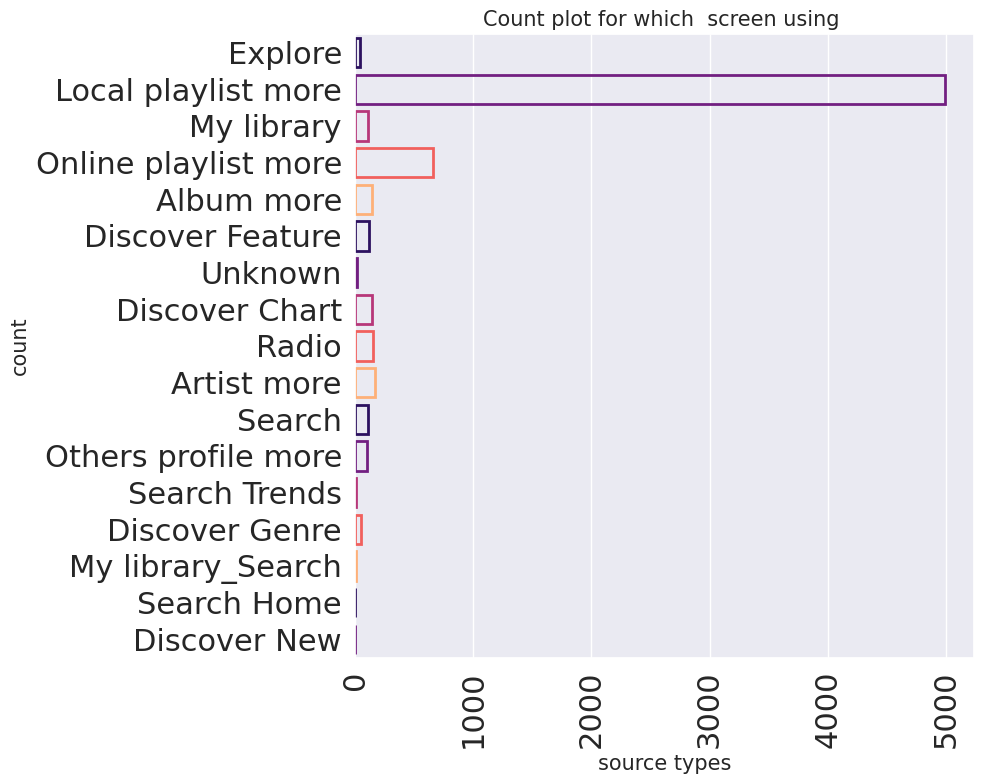

In [33]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='vertical')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [34]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 'vertical')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [35]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 'vertical')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

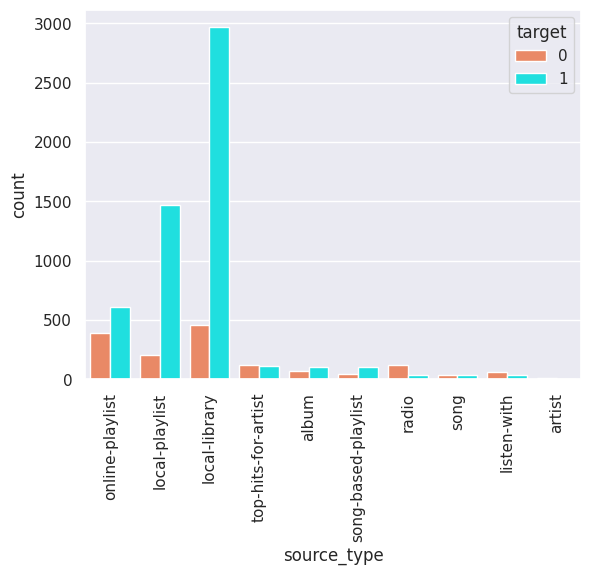

In [36]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

# Now doing some visualiaztion in members.csv

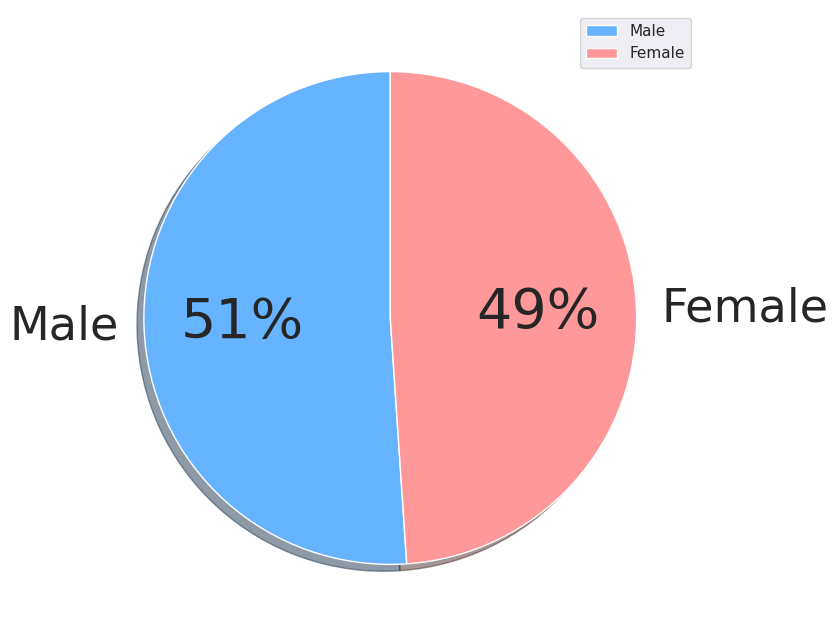

In [37]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes,
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<Axes: xlabel='language', ylabel='count'>

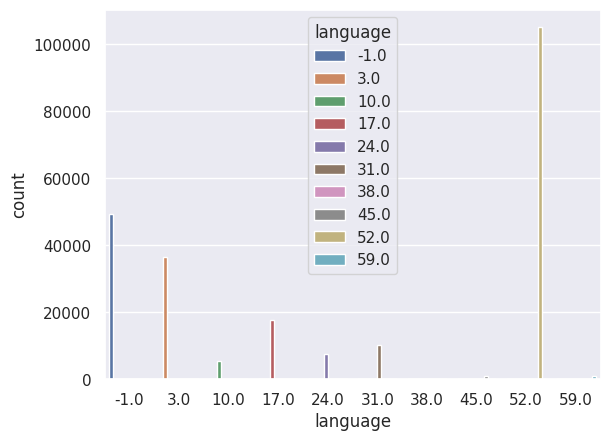

In [38]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

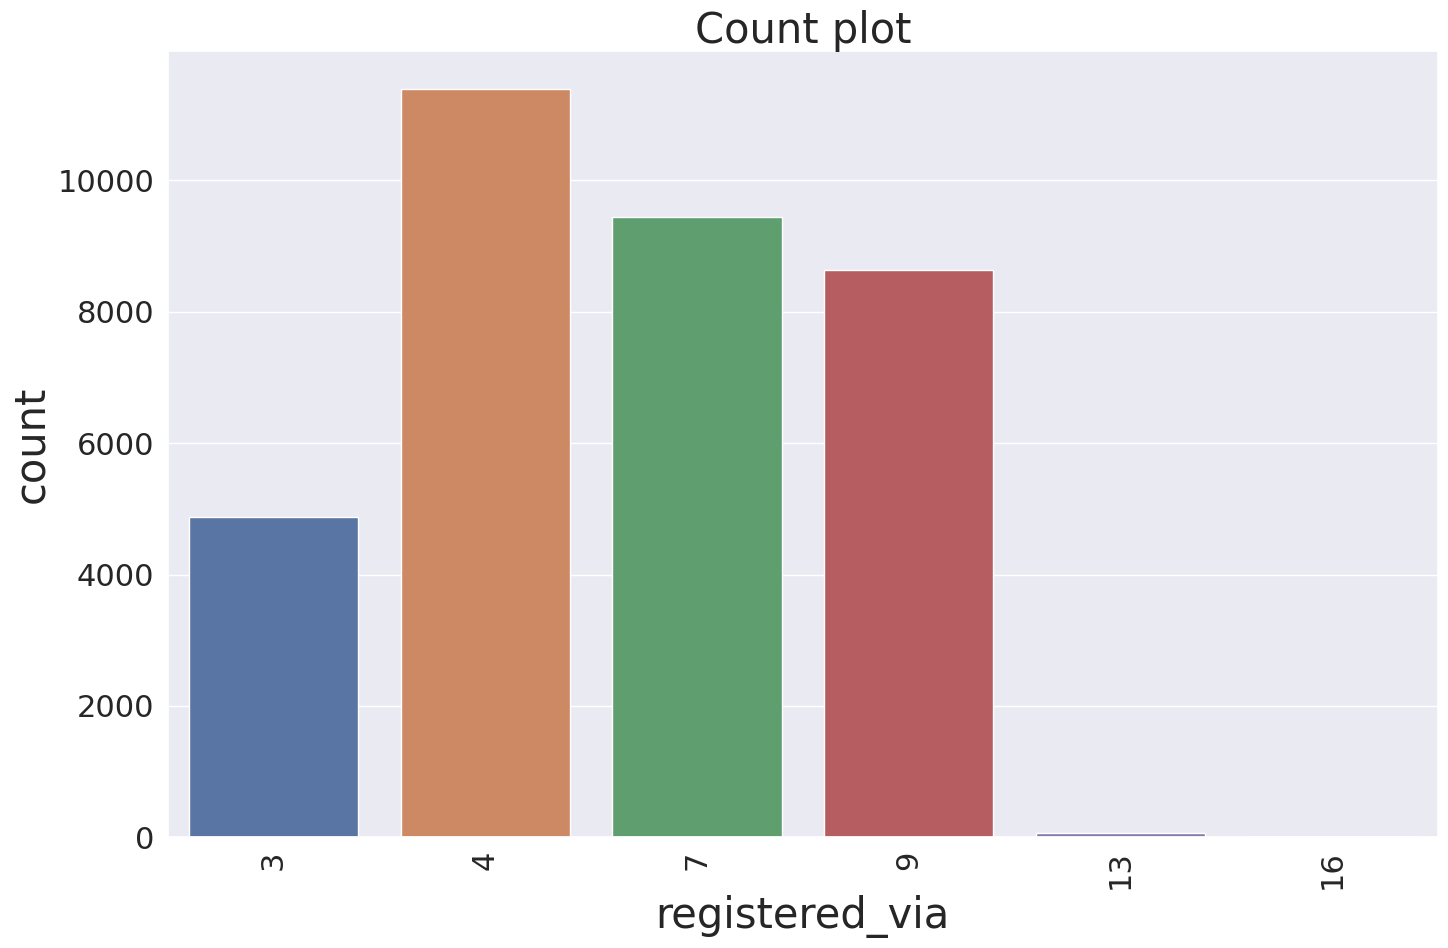

In [39]:
count_plot_function(members, 'registered_via')

Most of the registrations happened via method '4', '7' and '9'.

Few uses have registered theirselves via '13' and '16' methods.

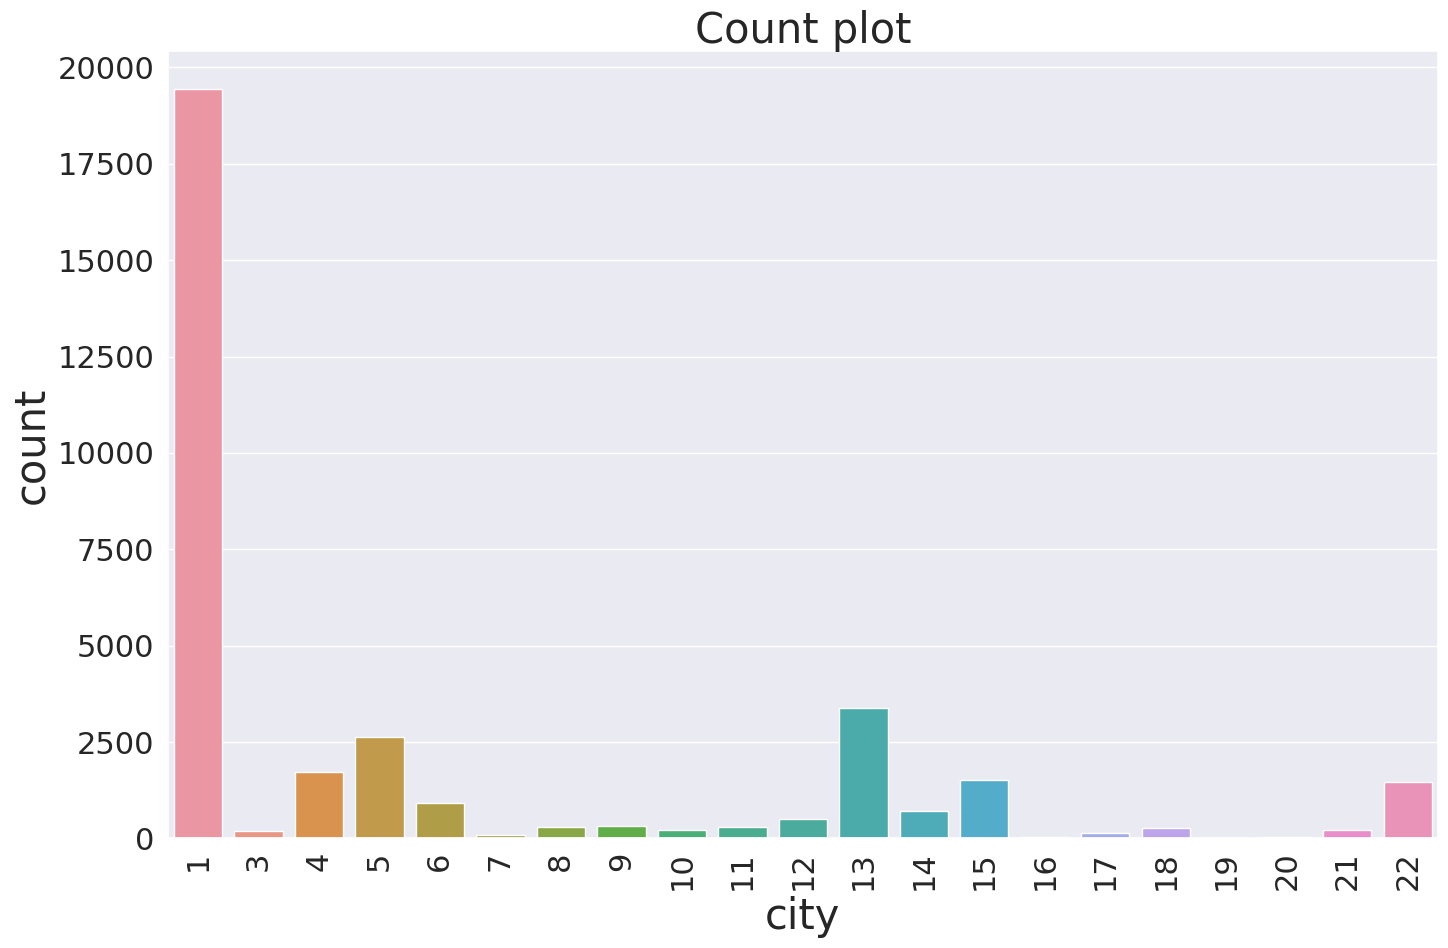

In [40]:
count_plot_function(members, 'city')

Most of the people who used to listen songs are from '1'- labelled city.

Some cities have very few people who prefer listening music via this music app

# Doing stats test on members.csv

<ipython-input-41-c2bce3735f8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(members.registration_init_time,color='orange')


Text(0.5, 1.0, 'PDF for Registration')

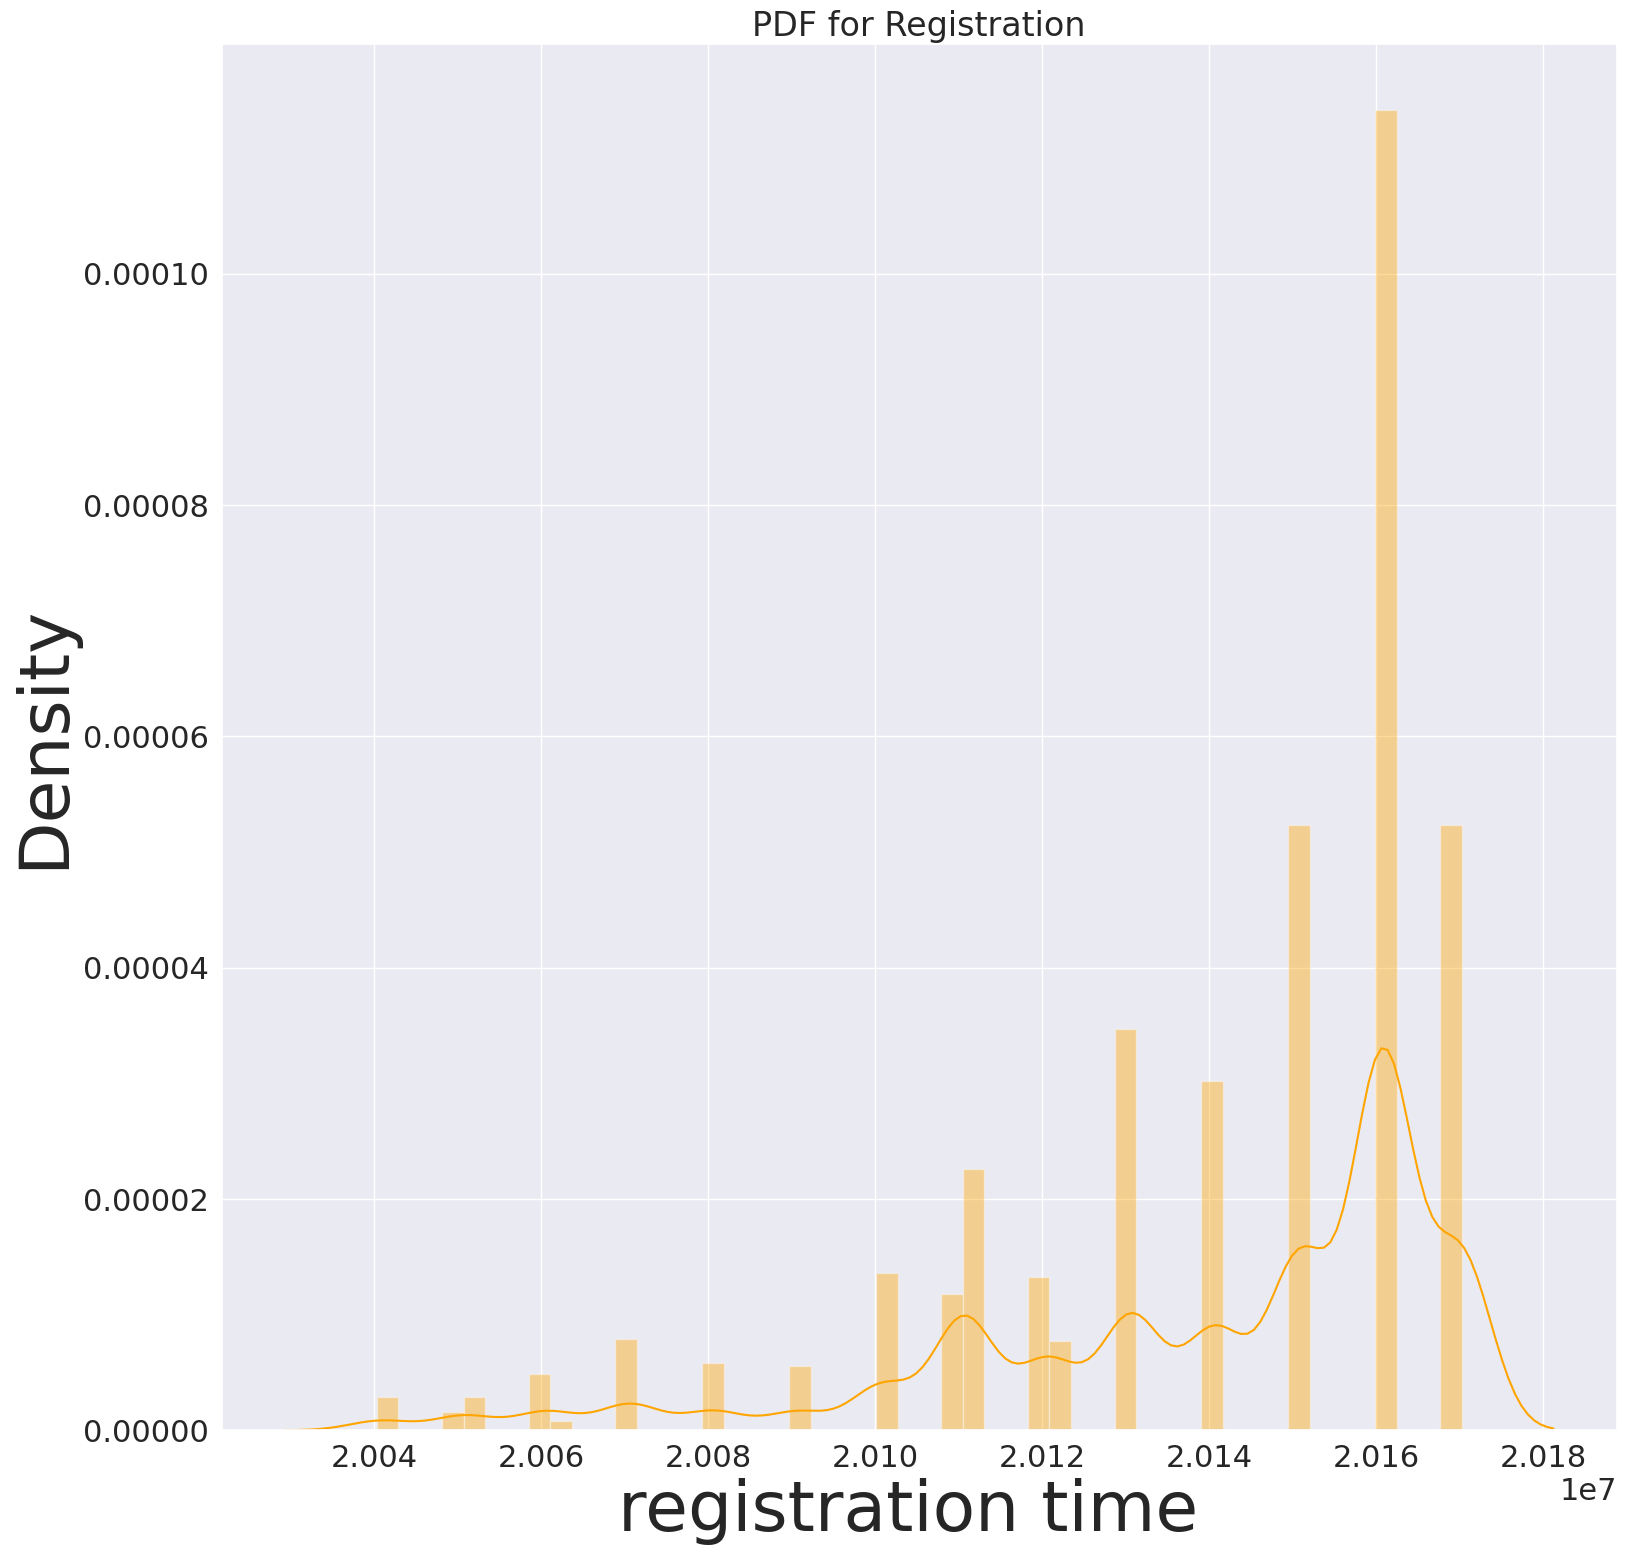

In [41]:
plt.figure(figsize = (18, 18))
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app

In [42]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6))
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

<ipython-input-42-aa9f4228bff9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='purple')


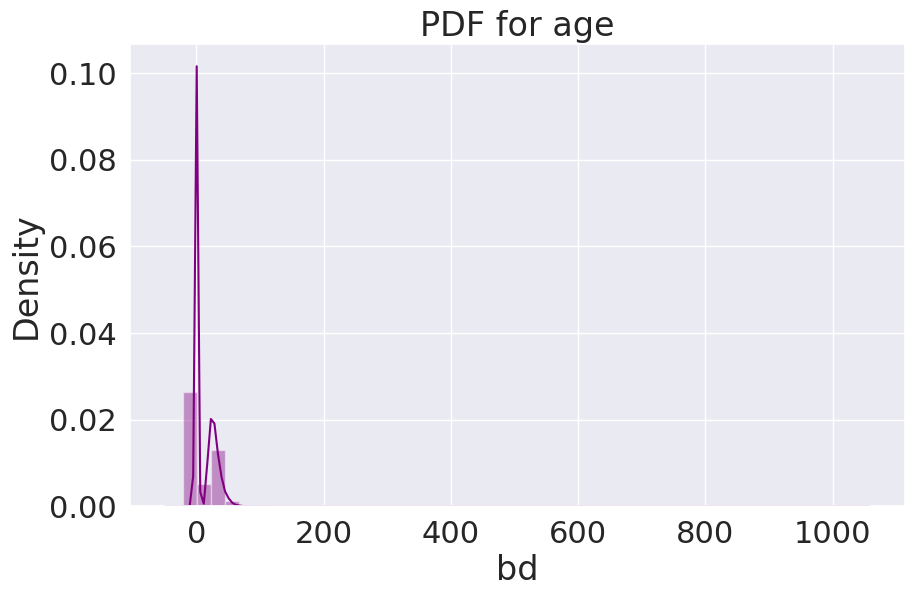

In [43]:
plot_pdf_cdf(members['bd'], False)

<ipython-input-42-aa9f4228bff9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')


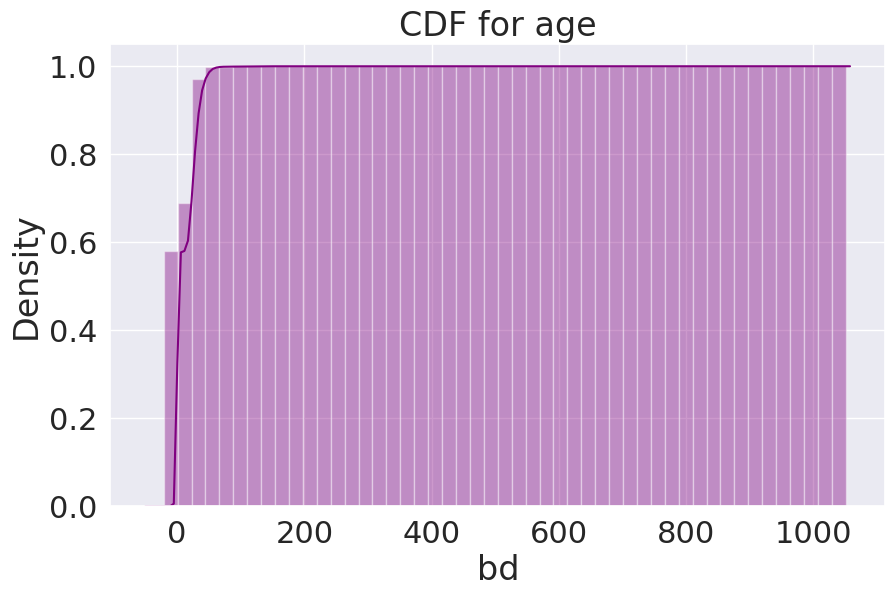

In [44]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [45]:
np.percentile(members['bd'].values, 98)

47.0

1. 98th percentile user is of 47 age.
2. Means most of the user are below 50.
3. We can also observe via above CDF that almost 99% values are below 50. There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans

In [46]:
#DATA PREPROCESSING AND CLEANING
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [47]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [48]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [49]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))


In [50]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [51]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')


In [52]:
train = train.fillna(-1)
test = test.fillna(-1)


In [53]:
import gc
del members, songs; gc.collect();

In [54]:
colm = list(train.columns)
colm.remove('target')

In [55]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 143.17it/s]


In [56]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [57]:
pip install lightgbm

# Model Building

In [58]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

# Trying out basic classification models

In [59]:
#TRYING OUT BASIC CLASSIFICATION MODELS
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

### Predicting training score & accuracy on test data using

### LogisticRegression & RandomForestClassifier

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [61]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 79.2


# Prediction using lightgbm

In [67]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [68]:
p_test = model1.predict(X_test)

# Printing accuracy of lgbm model on test data

In [69]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 77.733333%
